## Importing Libraries

In [44]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = keras.utils.image_dataset_from_directory(
    'C:/Users\HIMANSHU PATHAK/Documents/project/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = keras.utils.image_dataset_from_directory(
    'C:/Users\HIMANSHU PATHAK/Documents/project/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[155.75 144.75 142.75]
   [154.25 143.25 141.25]
   [146.5  135.5  133.5 ]
   ...
   [154.5  144.25 147.75]
   [149.5  133.   136.25]
   [153.   131.   136.5 ]]

  [[145.75 134.75 132.75]
   [154.   143.   141.  ]
   [154.   143.   141.  ]
   ...
   [143.75 140.   141.25]
   [144.75 135.5  136.5 ]
   [144.75 131.75 131.75]]

  [[148.5  137.5  135.5 ]
   [138.75 127.75 125.75]
   [154.5  143.5  141.5 ]
   ...
   [128.5  136.75 134.  ]
   [150.25 152.75 149.75]
   [144.25 143.   139.  ]]

  ...

  [[131.   123.   121.  ]
   [129.   121.   119.  ]
   [128.   120.   118.  ]
   ...
   [157.75 152.75 156.75]
   [159.   154.   158.  ]
   [159.5  154.5  158.5 ]]

  [[125.5  117.5  115.5 ]
   [125.   117.   115.  ]
   [129.75 121.75 119.75]
   ...
   [146.5  141.5  145.5 ]
   [143.5  138.5  142.5 ]
   [158.25 153.25 157.25]]

  [[127.75 119.75 117.75]
   [129.5  121.5  119.5 ]
   [129.5  121.5  119.5 ]
   ...
   [150.   145.   149.  ]
   [162.5  157.5  161.5 ]
   [145.75 140.75 14

## Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

### Building Convolutional Layer

In [8]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(128,128,3)))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\HIMANSHU PATHAK\Documents\project\environment\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Dropout(0.25))

In [14]:
model.add(Flatten())

In [15]:
model.add(Dense(units=1500,activation='relu'))

In [16]:
model.add(Dropout(0.4))

In [17]:
# Output layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'] )

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [20]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 790s 359ms/step - accuracy: 0.4109 - loss: 2.0863 - val_accuracy: 0.8333 - val_loss: 0.5266
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 771s 351ms/step - accuracy: 0.8431 - loss: 0.4932 - val_accuracy: 0.9105 - val_loss: 0.2761
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 766s 349ms/step - accuracy: 0.9070 - loss: 0.2877 - val_accuracy: 0.9164 - val_loss: 0.2559
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 767s 349ms/step - accuracy: 0.9320 - loss: 0.2047 - val_accuracy: 0.9288 - val_loss: 0.2208
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 767s 349ms/step - accuracy: 0.9547 - loss: 0.1384 - val_accuracy: 0.9383 - val_loss: 0.1996
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 768s 350ms/step - accuracy: 0.9632 - loss: 0.1095 - val_accuracy: 0.9512 - val_loss: 0.1604
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 763s 347ms/step - accuracy: 0.9720 - loss: 0.0886 - val_accuracy: 0.9550 - val_loss: 0.1500
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 761s 347ms/step - ac

## Model Evaluation

In [21]:
#Model evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 214s 97ms/step - accuracy: 0.9899 - loss: 0.0294


In [23]:
print(train_loss,train_acc)

0.02637992799282074 0.991165816783905


In [22]:
valid_loss,valid_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 57s 104ms/step - accuracy: 0.9628 - loss: 0.1272


In [24]:
print(valid_loss,valid_acc)

0.12007811665534973 0.9640336632728577


In [26]:
model.save("trained_model.keras")

In [27]:
training_history.history

{'accuracy': [0.6128600835800171,
  0.8660502433776855,
  0.9168077111244202,
  0.938245952129364,
  0.9561988711357117,
  0.9643217921257019,
  0.972003698348999,
  0.9763283133506775,
  0.9801123738288879,
  0.9824596047401428],
 'loss': [1.314146876335144,
  0.42315173149108887,
  0.25579744577407837,
  0.1862887293100357,
  0.13430775701999664,
  0.1073027029633522,
  0.08628315478563309,
  0.07205039262771606,
  0.06005270406603813,
  0.054094959050416946],
 'val_accuracy': [0.8333143591880798,
  0.9105395078659058,
  0.9164010882377625,
  0.9287502765655518,
  0.9383109211921692,
  0.9511722922325134,
  0.9550421237945557,
  0.9667084217071533,
  0.9495788812637329,
  0.9640336632728577],
 'val_loss': [0.5265707969665527,
  0.27610960602760315,
  0.2559068500995636,
  0.22077421844005585,
  0.1996109038591385,
  0.16037927567958832,
  0.1499982625246048,
  0.1141553670167923,
  0.16435176134109497,
  0.12007810175418854]}

In [30]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)


## Accuraacy Visualization

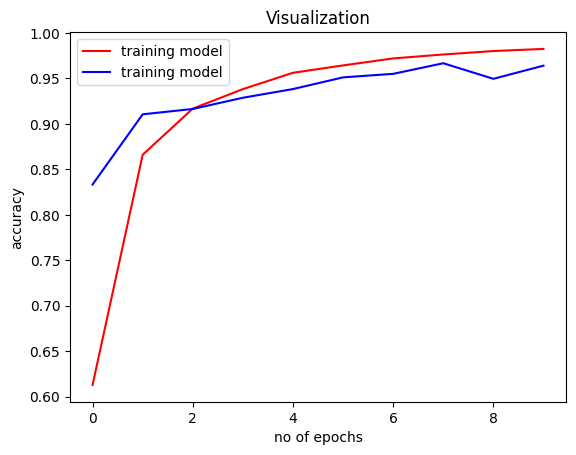

In [32]:
epochs = [i for i in range(1,11)]
plt.plot(training_history.history['accuracy'],color='red',label='training model')
plt.plot(training_history.history['val_accuracy'],color='blue',label='training model')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')
plt.title('Visualization')
plt.legend()
plt.show()

## Some other matrics for model evaluation

In [33]:
class_name= validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [35]:
test_set= keras.utils.image_dataset_from_directory(
    'C:/Users\HIMANSHU PATHAK/Documents/project/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [36]:
y_pred=model.predict(test_set)
y_pred

550/550 ━━━━━━━━━━━━━━━━━━━━ 52s 94ms/step


array([[9.9999857e-01, 5.8288158e-08, 6.3299505e-10, ..., 6.1066793e-13,
        4.7290394e-13, 1.3101358e-11],
       [9.9986207e-01, 1.0907780e-06, 7.7402573e-09, ..., 2.4495320e-10,
        1.4823055e-10, 1.8920177e-10],
       [9.9999988e-01, 5.0041753e-09, 4.1135725e-10, ..., 4.3657488e-14,
        2.1670400e-13, 4.1954162e-11],
       ...,
       [1.0778199e-14, 2.1933414e-17, 1.0675745e-12, ..., 1.8875877e-15,
        2.3872328e-14, 1.0000000e+00],
       [1.0235636e-12, 7.6170047e-17, 5.3444853e-12, ..., 1.2637389e-13,
        2.1124041e-13, 1.0000000e+00],
       [1.3759458e-15, 8.5492690e-18, 2.7112888e-13, ..., 1.2171390e-14,
        1.2648998e-11, 9.9999988e-01]], dtype=float32)

In [37]:
predicted_categories=tf.argmax(y_pred,axis=1)


In [38]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [39]:
true_categories= tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [41]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [47]:
from sklearn.metrics import classification_report,confusion_matrix


In [46]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.99      0.94      0.96       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.98      0.98      0.98       440
                                   Apple___healthy       0.98      0.96      0.97       502
                               Blueberry___healthy       0.99      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.95      0.94       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.94      0.

In [48]:
cm = confusion_matrix(y_true,predicted_categories)
cm.shape

(38, 38)

## confusion matrix visualization

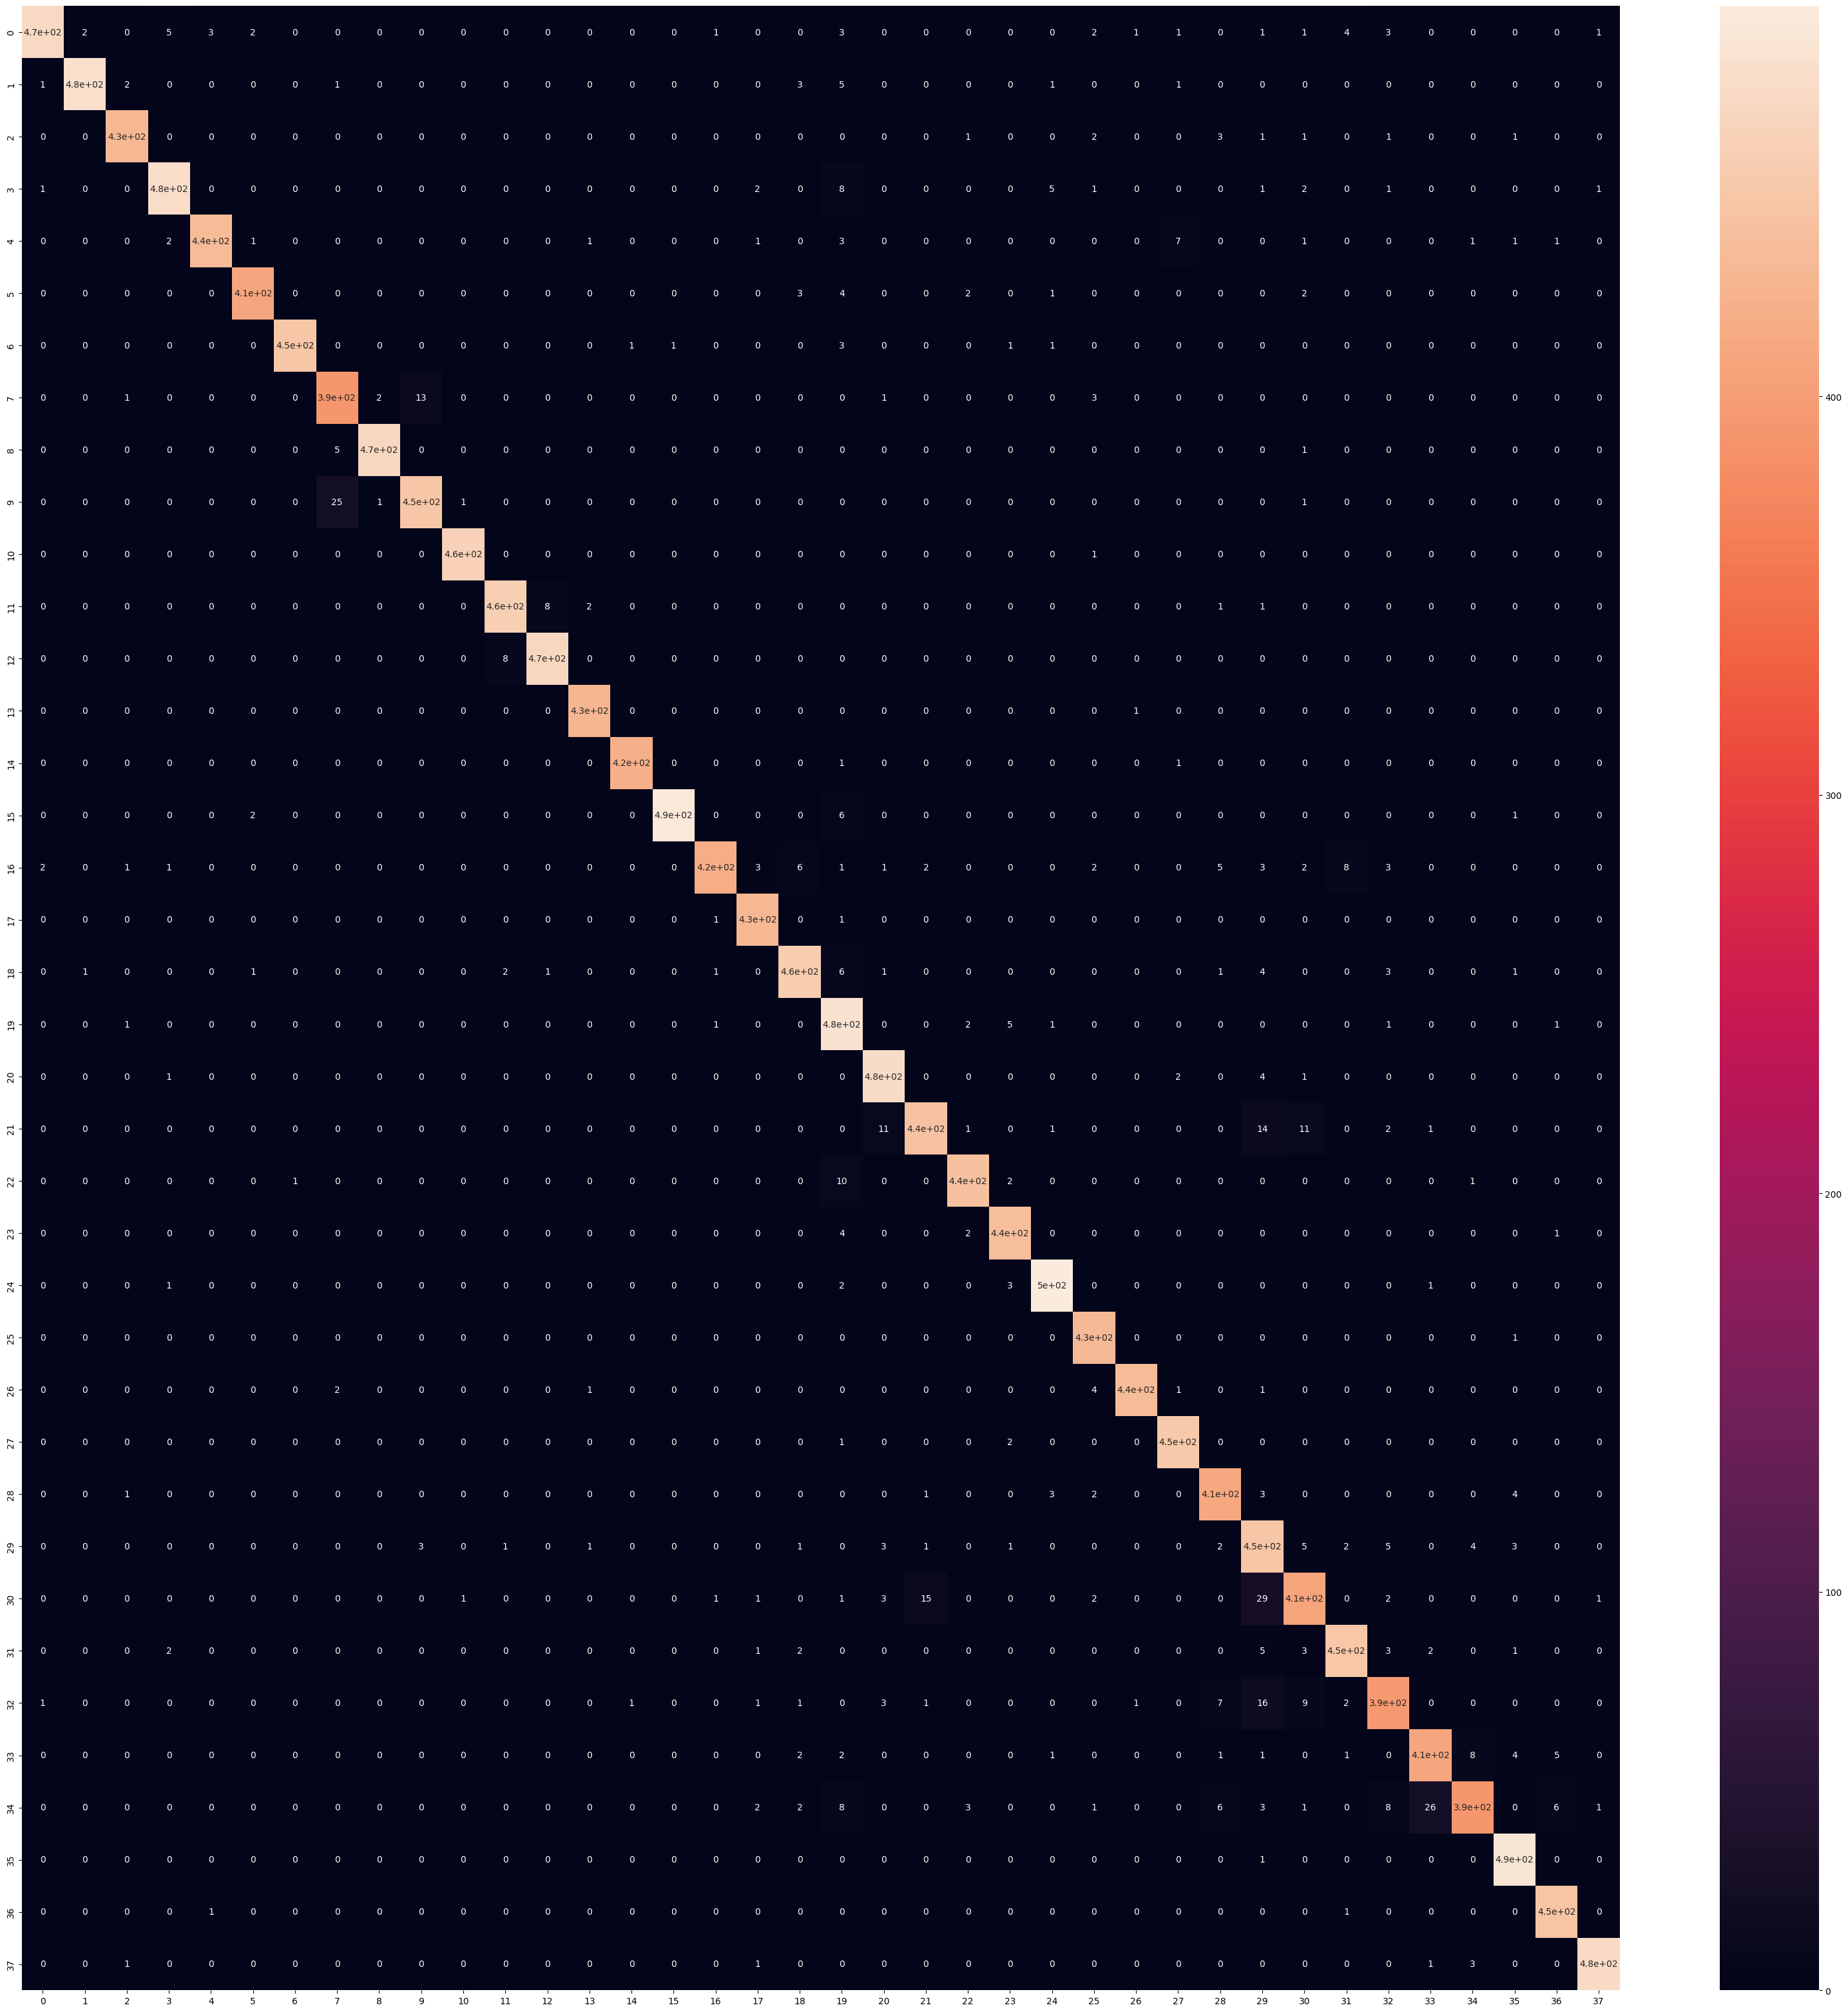

In [56]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})

plt.show()